# Laboratorio 2 - "Caracterizacion del Ruido Gaussiano"
### Alumno: Saillen, S
## Consigna
Realizar un código en una Jupyter notebook que permita extraer las componentes en fase (parte real) y en cuadratura (parte imaginaria) del receptor del SDR  configurado según los siguientes parámetros:
 - Uri = "ip:192.168.1.34"
(También puede ser "ip:192.168.1.35", "ip:192.168.1.32" o "ip:192.168.1.33")
 - Loopback         = 0 
 - Tx_cyclic_buffer = False
 - TxAtten          = -70
 - GainControlModes = "manual"
 - RxHardwareGain   = 70
 - RxBufferSize     = 2**20 
 
en donde los demás parámetros sin especificar pueden ser elegidos por el usuario.

Con las muestras obtenidas en las componentes en fase y cuadratura, se pide:
 1. Obtener la media y la varianza. 
 2. Realizar un histograma (Ver página 485 del libro "Intro a los sist. de comunicación").
 3. Normalizar el histograma para que el area encerrada sea igual a 1.
 4. Superponer el histograma normalizado con una función de densidad de probabilidad (PDF)     gaussiana teórica.
 5. Analizar la gaussianidad mediante un gráfico Q-Q haciendo uso de la función propia de python "qqplot".
 6. Generar mediante un código, una variable gaussiana compleja que tenga la misma media y varianza que la señal muestreada y obtener su histograma.
 7. Adjuntar la Jupyter Notebook que permitió obtener todos estos resultados.
 8. Escriba al final de la jupyter notebook una conclusión respecto a los resultados obtenidos en la práctica.

## Codigo

### Imports

In [1]:
!pip install pyadi-iio

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import adi
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Codigo Heredado

In [3]:
def plotSignal(signal):
#------------------------------- Transmitted I component ------------------------------- 
# Plot time domain
    plt.figure(figsize=(20,8), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(2,1,1)
    plt.plot(np.real(signal))
    plt.xlabel('n')
    plt.ylabel('Amplitud')
    plt.title('Componente en fase de la señal')
    plt.grid()
#------------------------------- Transmitted Q component -------------------------------
# Plot time domain
    plt.subplot(2,1,2)
    plt.plot(np.imag(signal))
    plt.xlabel('n')
    plt.ylabel('Amplitud')
    plt.title('Componente en cuadratura de la señal')
    plt.grid()
    plt.show()

In [4]:
def plotSpect(signal,samplingRate):
    plt.subplots(figsize=(15, 3))
    plt.grid()
    plt.title("Power Spectral Density")
    plt.psd(signal, len(signal), samplingRate, color='C1')
    plt.show()

### Configuracion de Parametros del SDR

In [5]:
#------------------------------- SDR Parameter Configuration -------------------------------

Uri              = "ip:192.168.1.34"
Loopback         = 0             # 0=Disabled, 1=Digital loopback, 2=Retransmiter
SamplingRate     = 521e5         # Sample rate RX and TX paths[Samples/Sec]                                 

TxLOFreq         = 954e6         # Carrier frequency of TX path [Hz]
TxAtten          = -70           # Attenuation applied to TX path, valid range is -89 to 0 dB [dB]
TxRfBw           = 2.0e6         # Bandwidth of front-end analog filter of TX path [Hz]
RxBufferSize     = 2**20         # Depend on the length of the transmit signal. Maximum tx buffer size 2**24[samples]
tx_cyclic_buffer = False

RxLOFreq         = TxLOFreq      # Carrier frequency of RX path [Hz]
GainControlModes = "manual"      # Receive path AGC Options: slow_attack, fast_attack, manual
RxHardwareGain   = 70            # Gain applied to RX path. Only applicable when gain_control_mode is set to 'manual'    
RxRfBw           = TxRfBw        # Bandwidth of front-end analog filter of RX path [Hz] 
RxBufferSize     = 2**20         # Rx Buffer size. Maximun value 2**28 [Samples]                                               

### Asignacion de parametros al SDR

In [6]:
sdr = adi.Pluto(Uri)
sdr.loopback = Loopback
sdr.sample_rate = SamplingRate
sdr.tx_rf_bandwidth = int(TxRfBw)
sdr.rx_rf_bandwidth = int(RxRfBw)
sdr.tx_hardwaregain_chan0 = TxAtten
sdr.rx_hardwaregain_chan0 = RxHardwareGain
sdr.gain_control_mode_chan0 = GainControlModes
sdr.tx_lo = int(TxLOFreq)
sdr.rx_lo = int(RxLOFreq)
sdr.rx_buffer_size = RxBufferSize
sdr.tx_cyclic_buffer = tx_cyclic_buffer

### Recibiendo la Señal

In [7]:
rxSignal = sdr.rx()

### 1. Grafico en Tiempo y Frecuencia de la Muestra

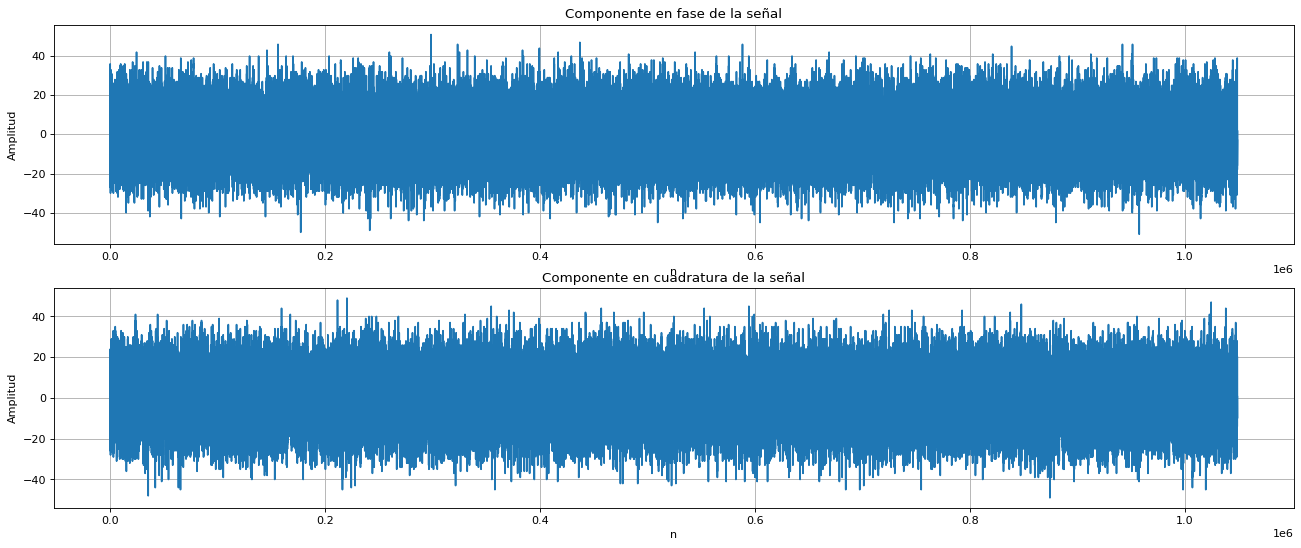

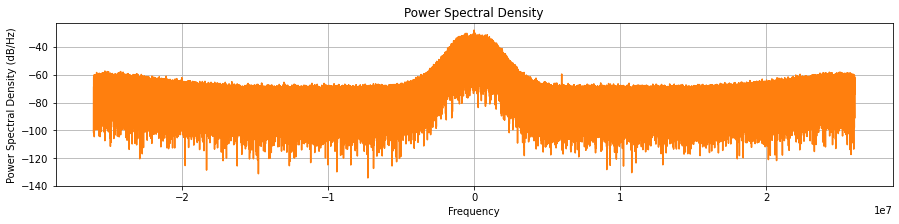

In [8]:
plotSignal(rxSignal)
plotSpect(rxSignal, SamplingRate)

### 2. Calculando la Media y Varianza

In [9]:
media = rxSignal.mean()
print(media.real)

0.02199077606201172


In [10]:
varianza = rxSignal.var()
print(varianza.real)

248.20984664237974


In [11]:
desviacion = rxSignal.std()
print(desviacion)

15.754676976770414


### 3. Histogramas

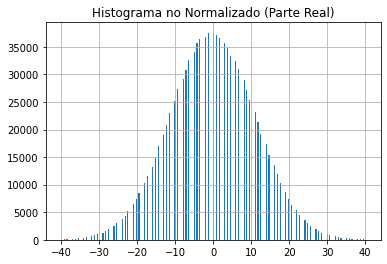

In [12]:
# ------ Histograma Parte Real ------
plt.hist(rxSignal.real, bins = 110, range = (-40,40), width = 0.3)
plt.title("Histograma no Normalizado (Parte Real)")
plt.grid()
plt.show()

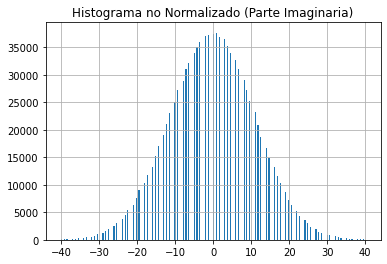

In [13]:
# ------ Histograma Parte Real ------
plt.hist(rxSignal.imag, bins = 110, range = (-40,40), width = 0.3)
plt.title("Histograma no Normalizado (Parte Imaginaria)")
plt.grid()
plt.show()

### 4. Histogramas Normalizados

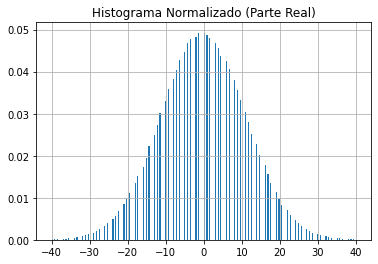

In [14]:
# ------ Histograma Parte Real ------
plt.hist(rxSignal.real, bins = 110, density = True, range = (-40,40), width = 0.3)
plt.title("Histograma Normalizado (Parte Real)")
plt.grid()
plt.show()

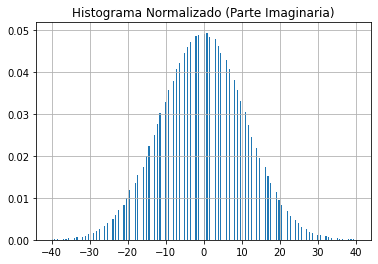

In [15]:
# ------ Histograma Parte Imaginaria ------
plt.hist(rxSignal.imag, bins = 110, density = True, range = (-40,40), width = 0.3)
plt.title("Histograma Normalizado (Parte Imaginaria)")
plt.grid()
plt.show()

### 5. Superponiendo el Histograma con una PDF Gaussiana Teorica

In [16]:
mu, sigma = stats.norm.fit(rxSignal.real)
x_hat = np.linspace(min(rxSignal.real), max(rxSignal.real), num=500)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

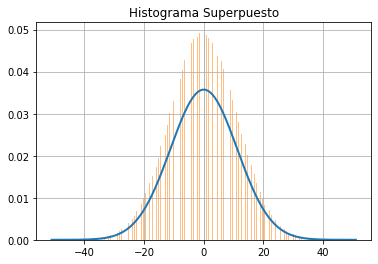

In [17]:
plt.plot(x_hat, y_hat, linewidth=2, label='normal')
plt.hist(rxSignal.real, bins = 110, density = True, range = (-40,40), width = 0.3, alpha = 0.5)
plt.title("Histograma Superpuesto")
plt.grid()
plt.show()

### 6. Analisis de gaussianidad usando un grafico Q-Q

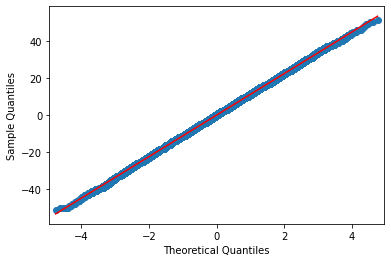

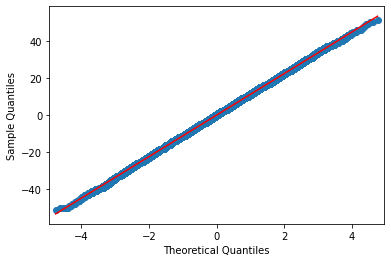

In [18]:
import statsmodels.api as sm
sm.qqplot(rxSignal.real, line = "s")

### 7. Variable Gaussiana Compleja que tenga la misma media y varianza que la señal muestreada, mostrando su grafica temporal, grafica en frecuencia y su histograma

0.016841085731154507
248.01661949288473


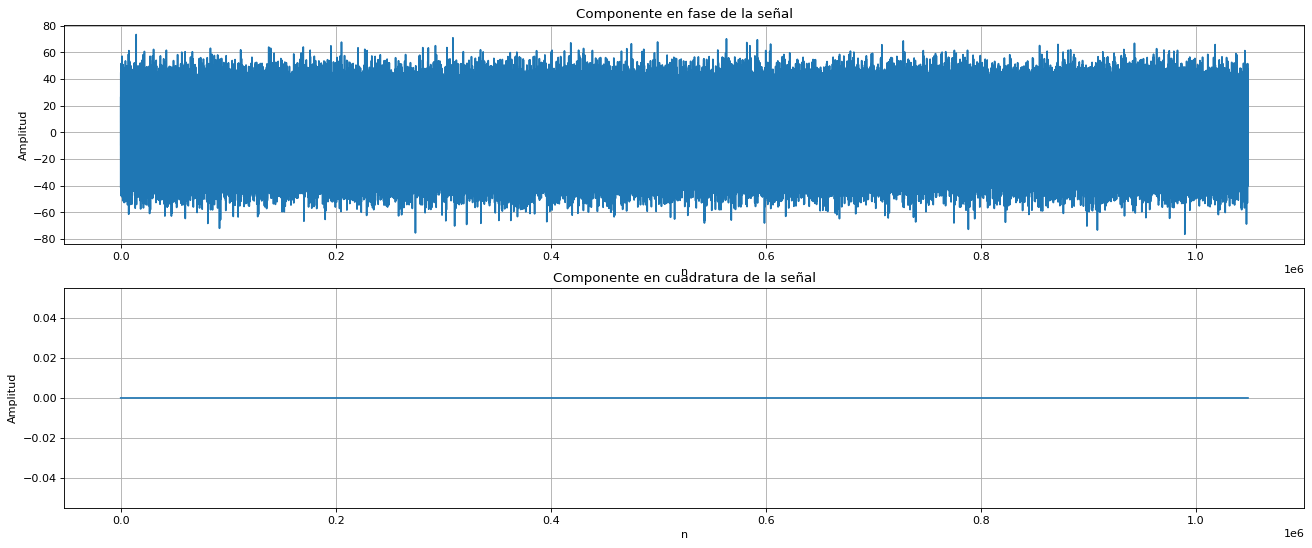

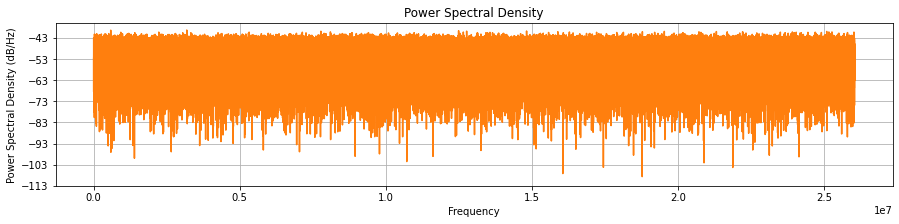

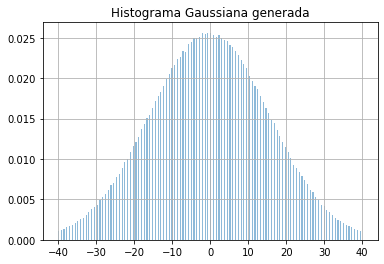

In [19]:
gaussiana = np.random.normal(loc = media.real, scale = desviacion, size = 2**20)

print(gaussiana.mean())
print(gaussiana.var())
# Como se observa tiene la misma media y varianza, el problema es que no es Compleja...
# ...no encontré como hacerla.

plotSignal(gaussiana)
plotSpect(gaussiana,SamplingRate)

plt.hist(gaussiana.real, bins = 110, density = True, range = (-40,40), width = 0.3, alpha = 0.5)
plt.hist
plt.title("Histograma Gaussiana generada")
plt.grid()
plt.show()

### Conclusión: 
Como se puede observar se logró categorizar la naturaleza del ruido captado, generalmente se comporta como una distribucion Normal, lamentablemente no pude lograr crear una funcion Gaussiana Compleja, y en el punto 4 la PDF que utilicé da muy cerca pero menor que la señal muestreada, sin embargo muestra que la naturaleza de la muestra es una distribucion Normal.

#### / La Jupyter Notebook que fue utilizada es la N°12 /